# **Question 1**

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import time 

# **Question 2**

In [1]:
class Timer(): 
  def __init__(self): 
    self.times = [] 
    self.start()
  
  def start(self): 
    self.start_time = time.time()
  
  def stop(self): 
    self.times.append(time.time() - self.start_time)
    return self.times[-1]

In [13]:
def fileNameSelect(): 
  print('Choose file to run: ')
  print('1: Small file \n')
  print('2: Medium file \n')
  print('3: Large file \n')

  while True: 
    try: 
      select = int(input())
      if select >= 1 and select <= 3: 
        break
      print('Please type a valid number ')
    except Exception: 
      print('Please type a number')
  return ['data/small.csv', 'data/medium.csv', 'data/large.csv'][select - 1]
  

In [4]:
def sortHis(table): 
  arr = [{'key': key, 'value': table[key]} for key in table]
  for i in range(len(arr)): 
      for j in range(i+1, len(arr)): 
          if arr[i]['value'] < arr[j]['value']: 
              tmp = arr[i]
              arr[i] = arr[j]
              arr[j] = tmp

  return arr 

# **Question 3**

In [14]:
file_name = fileNameSelect()
columns = ['id', 'price', 'date', 'type', 'old/new', 'duration', 'town/city', 'district', 'country', 'ppd_type', 'record_status']

Choose file to run: 
1: Small file 

2: Medium file 

3: Large file 



In [15]:
timer = Timer()
data_read = pd.read_csv(file_name)
df = pd.DataFrame(data=data_read)
df.columns = columns
print('Time to read file data: ', timer.stop())

Time to read file data:  0.07143402099609375


In [10]:
df.head(4)

,id,price,date,type,old/new,duration,town/city,district,country,ppd_type,record_status
0,{3BE8D582-F5C3-4613-A6DF-9AA0633E5FC1},35500,1998-05-08 00:00,F,N,L,NEWPORT,ISLE OF WIGHT,ISLE OF WIGHT,A,A
1,{3F27ACB5-CDBA-4879-B34F-9AA08C5068AD},49000,1998-05-18 00:00,D,N,F,BOSTON,EAST LINDSEY,LINCOLNSHIRE,A,A
2,{F6B50C0F-F615-405B-8E23-939089216AC5},94995,1998-07-21 00:00,D,N,F,PETERLEE,EASINGTON,DURHAM,A,A
3,{B16687CE-C115-4DF0-A9A5-93908E3C6E15},109950,1998-03-27 00:00,D,Y,F,SHERINGHAM,NORTH NORFOLK,NORFOLK,A,A


# **Question 4**

In [32]:
def getTable(key): 
  hist_table = {}
  for i in range(len(df)): 
      hist_value = df.iloc[i][key]
      if hist_value not in hist_table: 
          hist_table[hist_value] = 0
      
      hist_table[hist_value] += 1 
  return hist_table

In [92]:
# (city_his, type_his) = getCitiesTable()

In [34]:
def visualizeTransactionByCity(): 
  timer.start() 
  if file_name == 'small.csv': 
    city_his = getTable('town/city')
    sorted_city_hist = sortHis(table=city_his)
    cities = [item['key'] for item in sorted_city_hist][:10]
    values = [item['value'] for item in sorted_city_hist][:10]
  else: 
    city_list = np.array(df['town/city'].values.tolist()) 
    nodes, inv, counts = np.unique(city_list, return_inverse=True, return_counts=True)
    city_his = {}
    for i, node in enumerate(nodes): 
      city_his[node] = counts[i]
    sorted_city_hist = sortHis(table=city_his)
    cities = [item['key'] for item in sorted_city_hist][:10]
    values = [item['value'] for item in sorted_city_hist][:10]
  plt.figure(figsize=(15, 3))  # width:20, height:3
  plt.bar(cities, values, align='edge', width=0.5)
  plt.xlabel('City')
  plt.ylabel('Number of transaction')
  plt.show()
  print('The city has largest transaction: ', sorted_city_hist[0]['key'])
  print('Time to run question 4: ', timer.stop())

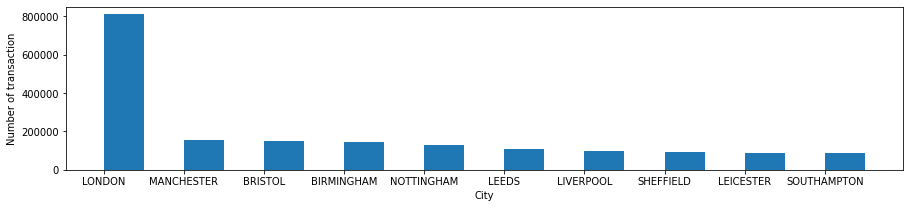

The city has largest transaction:  LONDON
Time to run question 4:  5.589359760284424


In [35]:
visualizeTransactionByCity()

# **Question 5**

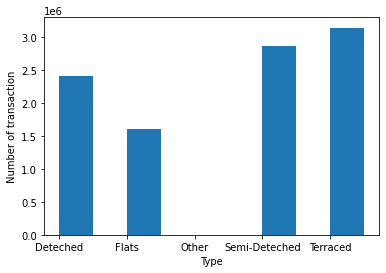

Time to run question 5:  1.5384371280670166


In [36]:
def question5(): 
  timer = Timer()
  timer.start() 
  
  if file_name == 'small.csv': 
    type_hist = getTable('type')
  else: 
    type_list = np.array(df['type'].values.tolist())
    nodes, inv, counts = np.unique(type_list, return_inverse=True, return_counts=True)
    type_hist = {} 
    for i, node in enumerate(nodes): 
      type_hist[node] = counts[i]
  
  property_his = {'D': 'Deteched', 'S': 'Semi-Deteched', 'T': 'Terraced', 'F': 'Flats', 'O': 'Other'}
  types = [property_his[type] for type in type_hist]
  amounts = type_hist.values()

  plt.bar(types, amounts, align='edge', width=0.5)
  plt.xlabel('Type')
  plt.ylabel('Number of transaction')
  plt.show()
  print('Time to run question 5: ', timer.stop())

question5()

# **Question 6**

In [37]:
# Calculate how many transaction conducted between 10 and 20 monthly
def dateApply(x): 
   x = x.split(' ')[0]
   return x 

def splitDate(): 
   global df 
   timer = Timer() 
   timer.start() 
   df['date'] = df['date'].apply(dateApply)
   dateDf = pd.DataFrame(df['date'].str.split('-').tolist(), columns=['year', 'month', 'day'])
   df = df.join(dateDf)
   print('Time to excute split date function: ', timer.stop())

In [38]:
splitDate()

Time to excute split date function:  13.305696964263916


In [39]:
def question6(): 
   timer = Timer() 
   timer.start()
   df['day'] = df['day'].astype(int)
   df['month'] = df['month'].astype(int)
   df['year'] = df['year'].astype(int)
   filter_day1 = np.array(df['day'] > 10)
   filter_day2 = np.array(df['day'] < 20)
   filter_day = np.logical_and(filter_day1, filter_day2)
   filter_df = df[filter_day]
   print('There are {} transaction conducted between 10th and 20th monthly'.format(len(filter_df)//12))
   print('Time to excute question 6: ', timer.stop())
question6()

There are 230340 transaction conducted between 10th and 20th monthly
Time to excute question 6:  4.3453521728515625


# **Question 7**

In [40]:
def question7(): 
   timer = Timer() 
   timer.start() 
   print('Input a month to sort: ') 
   try: 
      while True: 
         month = int(input())
         if month < 1 or month > 12: 
            print('Please input a valid month')
         break
   except Exception: 
      print('please input a number')
   
   df['price'] = df['price'].astype(int)
   filters = np.array(df['month'] == month)
   filterDf = df[filters]
   filterDf = filterDf.sort_values('price', ascending=False)

   print(filterDf.head())   
   print('Time to excute question 7: ', timer.stop()) 

question7()

Input a month to sort: 
                                             id    price        date type  \
5147078  {50F76474-2448-40D7-BBA3-6490F4604099}  8000000  2000-05-02    D   
5847716  {2D1FDAA8-911D-4456-BAE3-CE0C9C9F6C3A}  6250000  2000-05-06    D   
8793591  {7BFD349E-2107-4BDD-AE05-B85D7B7CA5A8}  5650000  2002-05-17    S   
9107464  {21A7CA52-B6C3-46D5-8FE5-CD07FC8A00E0}  5200000  2003-05-30    D   
8058722  {37B86D86-47D0-44A5-95A2-6205CF6E1F3A}  4624072  2002-05-29    D   

        old/new duration town/city                district         country  \
5147078       N        F    LONDON  KENSINGTON AND CHELSEA  GREATER LONDON   
5847716       Y        F  HATFIELD         WELWYN HATFIELD   HERTFORDSHIRE   
8793591       N        L    LONDON  KENSINGTON AND CHELSEA  GREATER LONDON   
9107464       N        L    LONDON  KENSINGTON AND CHELSEA  GREATER LONDON   
8058722       N        F     ASCOT               RUNNYMEDE          SURREY   

        ppd_type record_status  year  month 

# **Question 8**

Input type of housing, a new building or a old style ? 
Y: A newly built
N: A established residantal
Please type a valid value input
Input type of housing, a new building or a old style ? 
Y: A newly built
N: A established residantal
There are 678922 transaction conducted with New style from Jul


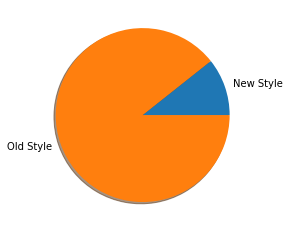

Time to excute question 8:  5.996523141860962


In [41]:
def question8(): 
   timer = Timer()
   timer.start() 
   while True: 
      print('Input type of housing, a new building or a old style ? ')
      print('Y: A newly built')
      print('N: A established residantal')
      type = input()
      if type != 'Y' and type != 'N': 
         print('Please type a valid value input')
      else: 
         break
   
   dfFilter = df[np.logical_and(np.array(df['old/new']==type), np.array(df['month'] >= 6))]

   print('There are {} transaction conducted with {} style from Jul'.format(len(dfFilter), 'New' if type == 'Y' else 'Old'))
   
   ydfFilter = df[np.logical_and(np.array(df['old/new']=='Y'), np.array(df['month'] >= 6))]
   ndfFilter = df[np.logical_and(np.array(df['old/new']=='N'), np.array(df['month'] >= 6))]
   values = np.array([len(ydfFilter), len(ndfFilter)])
   labels = ['New Style', 'Old Style']
   plt.pie(values, labels=labels, shadow=True)
   plt.show()
   print('Time to excute question 8: ', timer.stop())

question8()

# **Question 9**

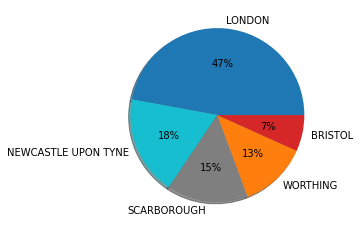

True

In [59]:
def question9(): 
   from user_requirement import building_type, min_price, max_price, ppd_type, duration
   case1 = np.array(df['duration'] == duration)
   case2 = np.array(df['price'] >= min_price)
   case3 = np.array(df['price'] <= max_price)
   case4 = np.array(df['ppd_type'] == ppd_type)
   case5 = np.array(df['type'] == building_type)

   resultDf = df[np.logical_and.reduce(np.array((case1, case2, case3, case4, case5)))]
   city_list = np.array(resultDf['town/city'].values.tolist())
   nodes, inv, counts = np.unique(city_list, return_inverse=True, return_counts=True)
   for i in range(len(counts)): 
      for j in range(len(counts)): 
         if counts[i] > counts[j]: 
            tmp = counts[i]
            tmp1 = nodes[i] 
            counts[i] = counts[j]
            counts[j] = tmp
            nodes[i] = nodes[j]
            nodes[j] = tmp1

   amount = counts[:5]
   city = nodes[:5]
   explode = [0, 0, 0, 0, 0.0]
   colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red']

   plt.pie(
         amount, 
         labels=city,
         autopct='%.0f%%', 
         colors=colors,
         explode = explode, 
         shadow = True)
   plt.show()
   return True

question9()

# **Question 10**

Search transactions in by city name: 
Select function: 
1: Visualize data by cities found
2: Sort data by price and write csv file about rows found


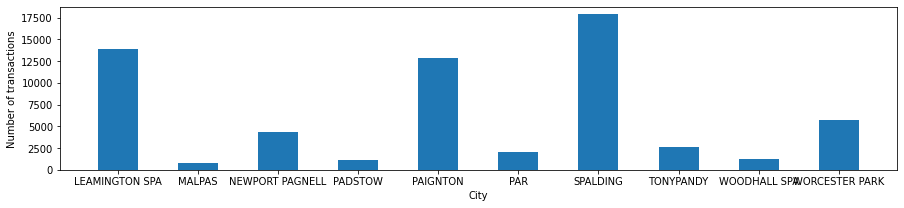

Time to excute question 9:  8.205337762832642


In [62]:
def question10(): 
   timer = Timer() 
   timer.start()
   city_list = np.array(df['town/city'].values.tolist())
   nodes, inv, counts = np.unique(city_list, return_inverse=True, return_counts=True)
   print('Search transactions in by city name: ')
   name = input() 
   # name = 'london'
   name_list = list() 
   for i, node in enumerate(nodes): 
      name = name.lower()
      _node = node.lower()
      if name in _node: 
         name_list.append({'city': node, 'count': counts[i]})

   if len(name_list) == 0: 
      print('No valid city name found')
      return False

   # district_list = 
   print('Select function: ')
   print('1: Visualize data by cities found')
   print('2: Sort data by price and write csv file about rows found')
   try: 
      select = int(input())
      # select = 2
      if select == 1: 
         cities = [item['city'] for item in name_list]
         values = [item['count'] for item in name_list]
         plt.figure(figsize=(15, 3))
         plt.bar(cities, values, align='center', width=0.5)
         plt.xlabel('City')
         plt.ylabel('Number of transactions')
         plt.show() 
      elif select == 2: 
         dfs = list() 
         for item in name_list: 
            name = item['city']
            dfs.append(df[np.array(df['town/city'] == name)])
         mergeDf = pd.concat(dfs) 
         mergeDf = mergeDf.sort_values('price', ascending=False)
         mergeDf.to_csv('filter_data.csv')
   except Exception as error: 
      print('Error when excute question 9: ', error)
   print('Time to excute question 9: ', timer.stop())

question10()